### Import some system libs

In [1]:
import os
import sys
import plotly.subplots as sp
import plotly.express as px
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import swifter

c:\Users\Tegbabu\sentiment-analysis-stock-week1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Load the dataset using the local .env 

In [2]:
sys.path.append('../scripts/')

from dotenv import load_dotenv
from load_data import load_csv
load_dotenv()
finance_data = os.getenv('FINANCIAL_NEWS')

finance_df = load_csv(finance_data)
if finance_df is not None:
    print(f"Data loaded successfully with {len(finance_df)} records.")

Data loaded successfully with 1407328 records.


In [3]:
print('Financial News Data:')
print(finance_df.head())
print(finance_df.columns)
print(finance_df.info())

Financial News Data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-

### Descriptive Statistics on Data

In [4]:
finance_df['headline_length'] = finance_df['headline'].apply(len)
print('Headline Lengths:')
finance_df['headline_length'].describe()

Headline Lengths:


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [5]:
## show minimum headline length
print(finance_df[finance_df['headline_length'] == 3])


         Unnamed: 0 headline  \
530954       533833      SPY   
530955       533834      SRS   
602684       605830      J.P   
678958       682383      AMJ   
912819       917537      J.P   
984798       989747      PCP   
1047479     1052673      QID   
1179797     1185514      SPY   
1191387     1197147      SUN   
1191388     1197148      SUN   
1228292     1234142      TJX   
1358108     1364530      WNR   

                                                       url  \
530954   https://www.benzinga.com/bullbeartrades/2009/7...   
530955   https://www.benzinga.com/bullbeartrades/2009/7...   
602684   https://www.benzinga.com/analyst-ratings/analy...   
678958     https://www.benzinga.com/news/14/08/4749350/amj   
912819   https://www.benzinga.com/analyst-ratings/analy...   
984798                   https://www.benzinga.com/6396/pcp   
1047479                  https://www.benzinga.com/4745/qid   
1179797  https://www.benzinga.com/bullbeartrades/2009/7...   
1191387                  

In [6]:
finance_df[finance_df['headline_length']>500]

Unnamed: 0                                           headline  \
238137      239614  Check Point® Software Technologies Ltd. (NASDA...   
701748      705317  JinkoSolar Tiger Pro Series Receives World's F...   

                                                      url      publisher  \
238137  https://www.benzinga.com/news/20/01/15132679/c...  Charles Gross   
701748  https://www.benzinga.com/news/20/06/16166972/j...  Charles Gross   

                             date stock  headline_length  
238137        2020-01-16 00:00:00  CHKP              509  
701748  2020-06-03 05:45:14-04:00   JKS              512

<Axes: >

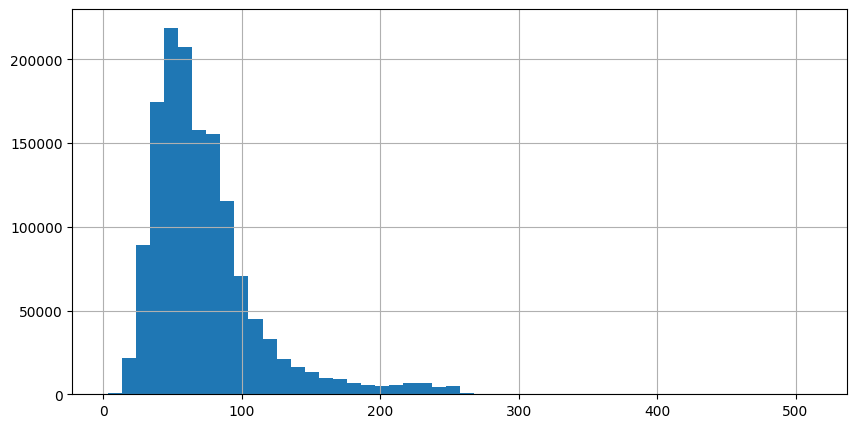

In [7]:
finance_df['headline_length'].hist(bins=50, figsize=(10, 5))

In [8]:
np.round(finance_df['headline_length'].describe(), 2)

count    1407328.00
mean          73.12
std           40.74
min            3.00
25%           47.00
50%           64.00
75%           87.00
max          512.00
Name: headline_length, dtype: float64

In [9]:
#%pip install nbformat

fig = px.histogram(finance_df, x='headline_length', nbins=30, title='Distribution of Headline Lengths')
fig.show()

##### Let us count the number of articles published per date in which date the articles where published most

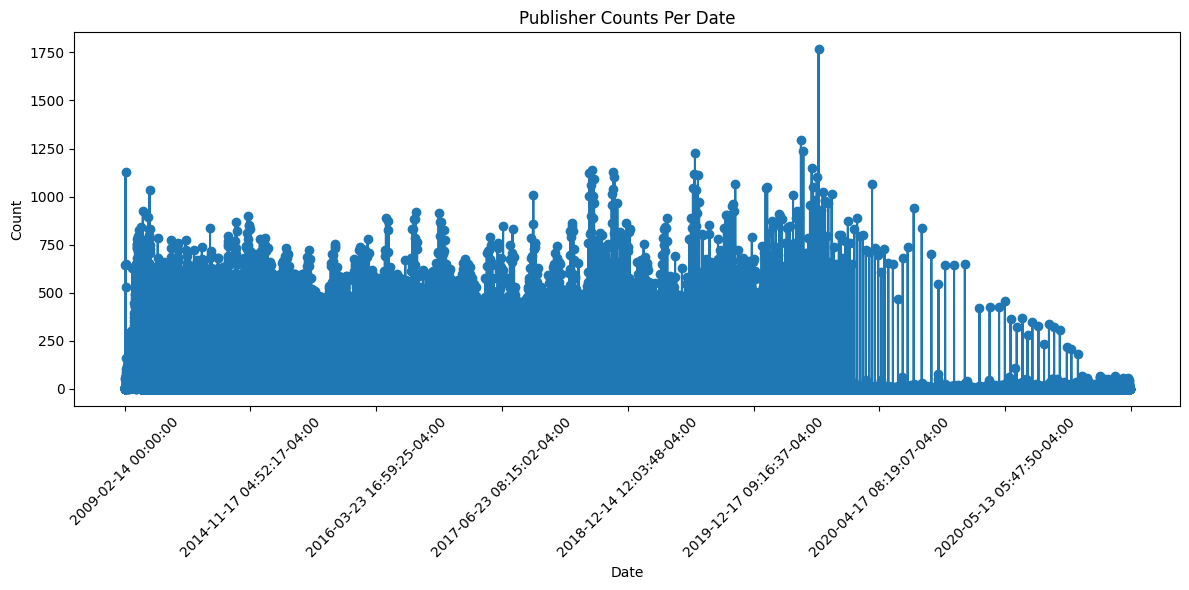

In [10]:
publisher_counts_per_date = finance_df['date'].value_counts()

publisher_counts_per_date = publisher_counts_per_date.sort_index()
plt.figure(figsize=(12, 6))
publisher_counts_per_date.plot(kind='line', marker='o')
plt.title("Publisher Counts Per Date")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Let us count the number of articles per publisher which is to identify which publishers are most active

In [11]:
#The number of articles per publisher
publisher_count = finance_df['publisher'].value_counts()

fig = px.bar(publisher_count, x=publisher_count.index, y=publisher_count.values, height=500,
               labels={'x': 'Publisher', 'y': 'Number of Articles'},
               title='Number of Articles per Publisher')
fig.update_layout(xaxis={"categoryorder": "total descending"})
fig.show()

In [12]:
### publication dates to see trends over time
finance_df['date'] = pd.to_datetime(finance_df['date'], format='ISO8601', utc=True)
finance_df['date'] = finance_df['date'].dt.date
finance_df['date'].value_counts().sort_index()

date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
Name: count, Length: 3955, dtype: int64

In [13]:
finance_df.describe

<bound method NDFrame.describe of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher

In [14]:
finance_df['headline']

0                    Stocks That Hit 52-Week Highs On Friday
1                 Stocks That Hit 52-Week Highs On Wednesday
2                              71 Biggest Movers From Friday
3               46 Stocks Moving In Friday's Mid-Day Session
4          B of A Securities Maintains Neutral on Agilent...
                                 ...                        
1407323               Top Narrow Based Indexes For August 29
1407324    Recap: Wednesday's Top Percentage Gainers and ...
1407325    UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326    Oppenheimer Initiates China Zenix At Outperfor...
1407327    China Zenix Auto International Opens For Tradi...
Name: headline, Length: 1407328, dtype: object

#### Text Analysis (Sentiment analysis and Topic modeling)

In [15]:
from sentimental_analysis import get_sentiment_word

In [16]:
finance_df_red = finance_df[:10000]

In [17]:

finance_df_red['Sentiment'] = finance_df_red['headline'].apply(get_sentiment_word)

C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_8604\194570266.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
finance_df_red.head()

Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock  headline_length  Sentiment  
0  2020-06-05     A               39      0.000  
1  2020-06-03     A               42      0.000  
2  2020-05-26     A               29      0.000  
3  2020-05-22     A               44      0.000  
4  2020-05-22     A               87      0.296

In [19]:
finance_df_red[finance_df_red["stock"]=="AAPL"]

Unnamed: 0                                           headline  \
6680        7120  Tech Stocks And FAANGS Strong Again To Start D...   
6681        7121      10 Biggest Price Target Changes For Wednesday   
6682        7122  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   
6683        7123  Deutsche Bank Maintains Buy on Apple, Raises P...   
6684        7124  Apple To Let Users Trade In Their Mac Computer...   
...          ...                                                ...   
7116        7585  UBS Maintains Buy on Apple, Lowers Price Targe...   
7117        7586                  123 Biggest Movers From Yesterday   
7118        7587  Crude Awakening: Energy Sector Takes A 20% Spi...   
7119        7588     Investor Movement Index Summary: February 2020   
7120        7589      101 Stocks Moving In Monday's Mid-Day Session   

                                                    url          publisher  \
6680  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
6681  https://www.benzinga.com/analyst-ratings/price...         Lisa Levin   
6682  https://www.benzinga.com/short-sellers/20/06/1...  Benzinga Newsdesk   
6683  https://www.benzinga.com/news/20/06/16219873/d...  Benzinga Newsdesk   
6684  https://www.benzinga.com/news/20/06/16218697/a...      Neer Varshney   
...                                                 ...                ...   
7116  https://www.benzinga.com/news/20/03/15514989/u...         Vick Meyer   
7117  https://www.benzinga.com/news/20/03/15514298/1...         Lisa Levin   
7118  https://www.benzinga.com/news/earnings/20/03/1...         JJ Kinahan   
7119  https://www.benzinga.com/news/earnings/20/03/1...      TD Ameritrade   
7120  https://www.benzinga.com/news/20/03/15508983/1...         Lisa Levin   

            date stock  headline_length  Sentiment  
6680  2020-06-10  AAPL               69     0.5574  
6681  2020-06-10  AAPL               45     0.0000  
6682  2020-06-10  AAPL               87     0.2023  
6683  2020-06-10  AAPL               65     0.0000  
6684  2020-06-10  AAPL               87     0.3818  
...          ...   ...              ...        ...  
7116  2020-03-10  AAPL               55    -0.1280  
7117  2020-03-10  AAPL               33     0.0000  
7118  2020-03-09  AAPL               91    -0.9062  
7119  2020-03-09  AAPL               46     0.0000  
7120  2020-03-09  AAPL               45     0.0000  

[441 rows x 8 columns]

Now we need to create posetive, negative, neutral for polarity of sentiment

In [20]:
finance_df_red['sentiment_score_word'] = finance_df_red['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_8604\1130965338.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
finance_df_red.head()

Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock  headline_length  Sentiment sentiment_score_word  
0  2020-06-05     A               39      0.000              Neutral  
1  2020-06-03     A               42      0.000              Neutral  
2  2020-05-26     A               29      0.000              Neutral  
3  2020-05-22     A               44      0.000              Neutral  
4  2020-05-22     A               87      0.296             Positive

In [22]:
negative_count = (finance_df_red['sentiment_score_word']=='Negative').sum()
positive_count = (finance_df_red['sentiment_score_word']=='Positive').sum()
neutral_count = (finance_df_red['sentiment_score_word']=='Neutral').sum()
print(f"Negative: {negative_count}, Positive: {positive_count}, Neutral: {neutral_count}")

Negative: 1653, Positive: 2894, Neutral: 5453


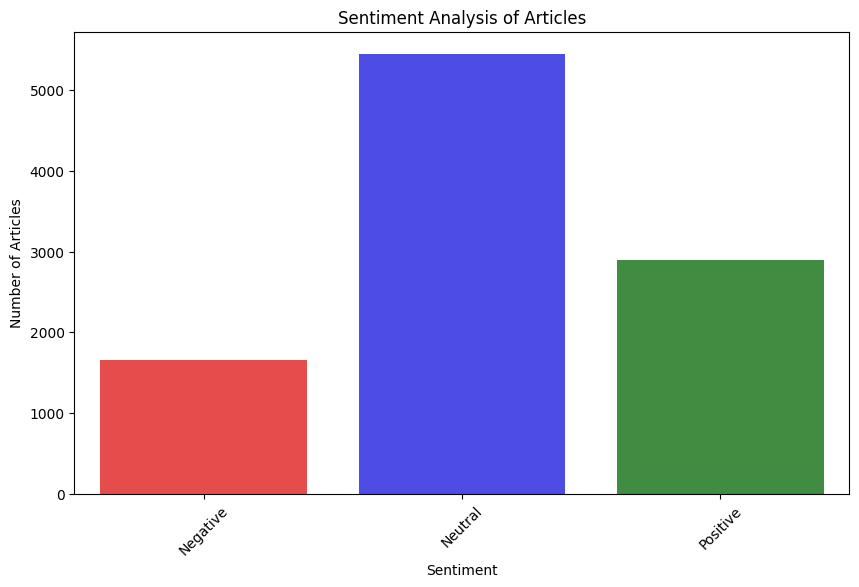

In [23]:
from sentimental_analysis import articles_sentiment_analysis
articles_sentiment_analysis(finance_df_red)

<Axes: xlabel='date'>

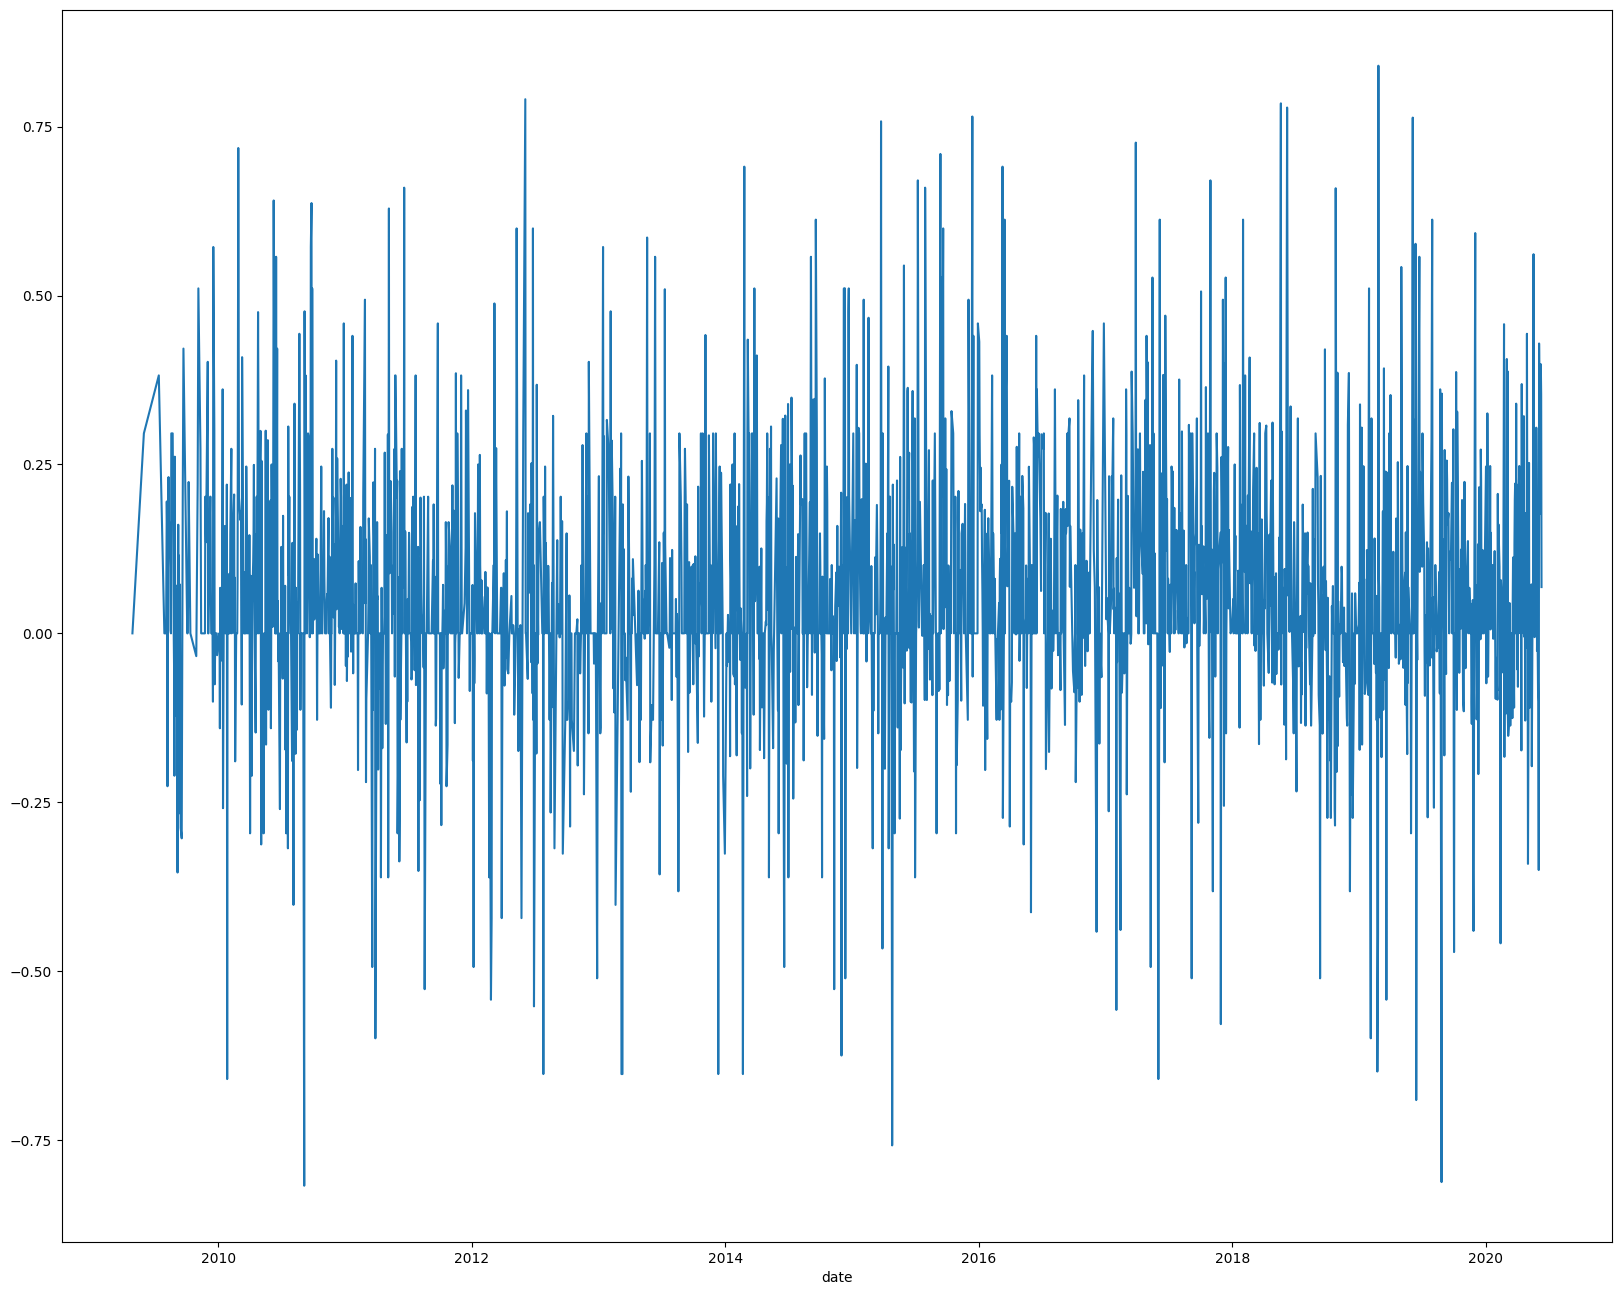

In [24]:
finance_df_red.groupby('date')['Sentiment'].mean().plot(figsize=(20,16))

##### Number of Published articles wrt sentiment categories

In [25]:
sentiment_Categories=finance_df_red['sentiment_score_word'].value_counts()
print(sentiment_Categories)

sentiment_score_word
Neutral     5453
Positive    2894
Negative    1653
Name: count, dtype: int64


##### Categorize Sentiment by pecentage

In [26]:
number_Of_Sentiment=finance_df_red['sentiment_score_word'].shape

number_Of_Sentiment

(10000,)

In [27]:
number_Of_Sentiment=finance_df_red['sentiment_score_word'].shape
percentage_Of_Categories = np.round((sentiment_Categories/number_Of_Sentiment)*100,2)
percentage_Of_Categories.head()

sentiment_score_word
Neutral     54.53
Positive    28.94
Negative    16.53
Name: count, dtype: float64

## Time Series Analysis

In [28]:
# Convert date to datetime for analysis
#finance_df['date'] = pd.to_datetime(finance_df['date'], errors='coerce')
#finance_df.head(5)

#### Publication Frequency Over Time

In [29]:
# Group by date and count the number of publications
finance_df['date'] = pd.to_datetime(finance_df['date'], errors='coerce')
finance_df['publication_date'] = finance_df['date'].dt.date
daily_counts = finance_df.groupby('publication_date').size()

##### Plot daily publication frequency

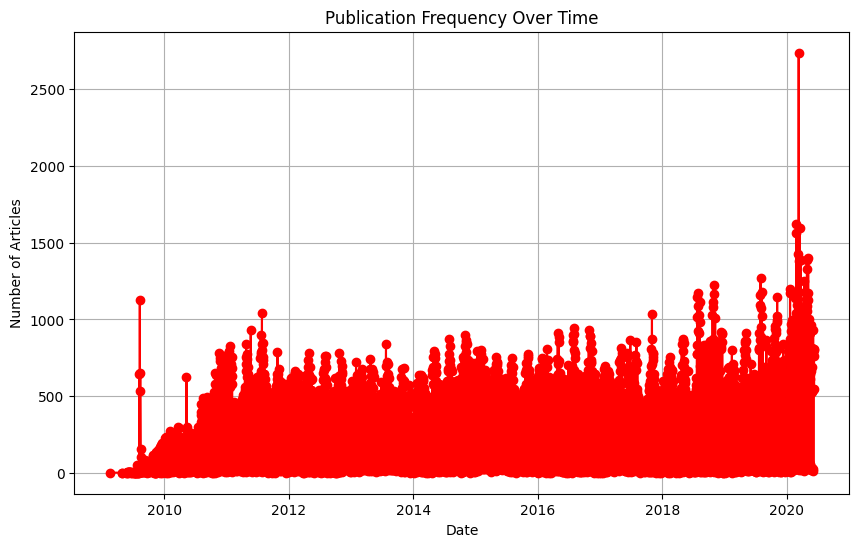

In [30]:

plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', marker='o', color='red')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

##### Number of Publication per hour

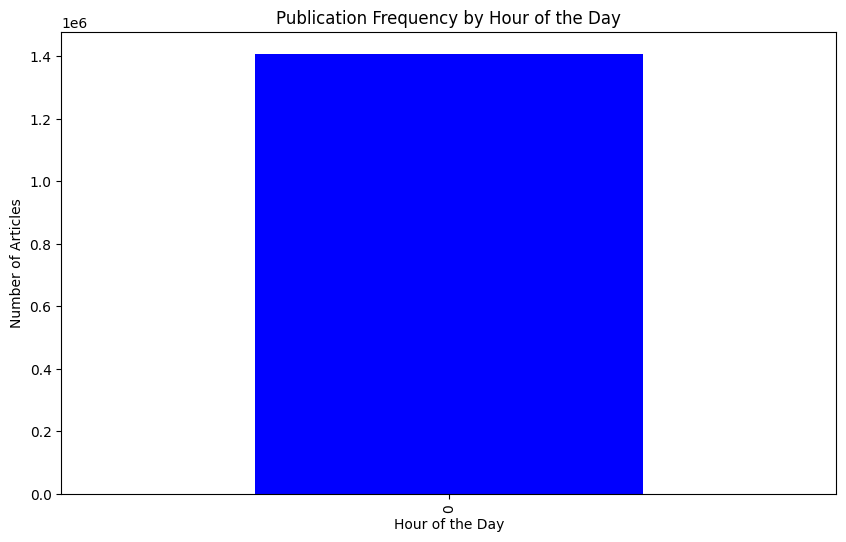

In [31]:
# Extract hour from the `date` column
finance_df['publication_hour'] = finance_df['date'].dt.hour

# Count the number of publications by hour
hourly_counts = finance_df['publication_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='blue')
plt.title('Publication Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()



### Analysis on Publisher

In [32]:
publisher_counts = finance_df['publisher'].value_counts()
print("Top 10 Publishers by Article Count:")
print(publisher_counts.head(10))
print("\nLast 10 Publishers by Article Count:")
print(publisher_counts.tail(10))

Top 10 Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

Last 10 Publishers by Article Count:
publisher
Brian Dolan                        1
Happy Trading                      1
Howie Bick                         1
MelissaBurns                       1
Growth Aces                        1
Shazir Mucklai - Imperium Group    1
Laura Jennings                     1
Eric Martin                        1
Jose Rodrigo                       1
Jeremie Capron                     1
Name: count, dtype: int64


In [33]:
publisher_countss = finance_df_red['publisher'].value_counts()
print("Top 10 Publishers by Article Count for reduced dataset:")
print(publisher_countss.head(10))
print("\nLast 10 Publishers by Article Count for reduced dataset:")
print(publisher_countss.tail(10))

Top 10 Publishers by Article Count for reduced dataset:
publisher
Paul Quintaro        1464
Lisa Levin           1249
Benzinga Newsdesk    1199
Benzinga Staff        621
Monica Gerson         581
Charles Gross         436
Eddie Staley          346
Hal Lindon            306
Zacks                 243
Vick Meyer            208
Name: count, dtype: int64

Last 10 Publishers by Article Count for reduced dataset:
publisher
BrianSozzi          1
Neal Goyal          1
David Tumm          1
Marcus Goncalves    1
Alex Biles          1
Brantley Foster     1
pconfidential       1
Kurt Zuschlag       1
Kenny Polcari       1
Victor Nguyen       1
Name: count, dtype: int64
